# DDP dataset Notebook

1. [Loading EEG-data and metadata](#1)
2. [ePodium Events](#2)
3. [The Experiment](#3)
4. [Analysing event related potentials](#4)

#### Import Packages

In [13]:
import mne
import numpy as np
import os
import glob
import ipywidgets
import pandas as pd

import local_paths

from functions import ddp
from functions import display_helper

<br>

<a id='1'></a>
## 1. Loading EEG-data and metadata

TODO: Explain metadata

In [14]:
dataset_raw, dataset_filenames = ddp.load_dataset(local_paths.DDP, max_files = 5)
# TODO load metadata

5 EEG files loaded


In [21]:
print(f"The participants are between the age of {epod_children['Age_days_a'].min()} "
      f"and {int(clean_b_dataframe['Age_days_b'].max())} days. "
      f"({round(epod_children['Age_months_a'].min(), 1)} to "
      f"{float(clean_b_dataframe['Age_months_b'].max())} months)")

dataset_raw[4].info['sfreq']

NameError: name 'epod_children' is not defined

In [ ]:
dataset_raw[0].to_data_frame()

Reading 0 ... 1499679  =      0.000 ...  2999.358 secs...


/tmp/ipykernel_3650971/4120069827.py:4: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(labels["path"][raw_index], preload = True)
/tmp/ipykernel_3650971/4120069827.py:4: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = mne.io.read_raw_cnt(labels["path"][raw_index], preload = True)


Used Annotations descriptions: ['2', '3', '4', '5', '55', '66', '77', '80', '81', '88']


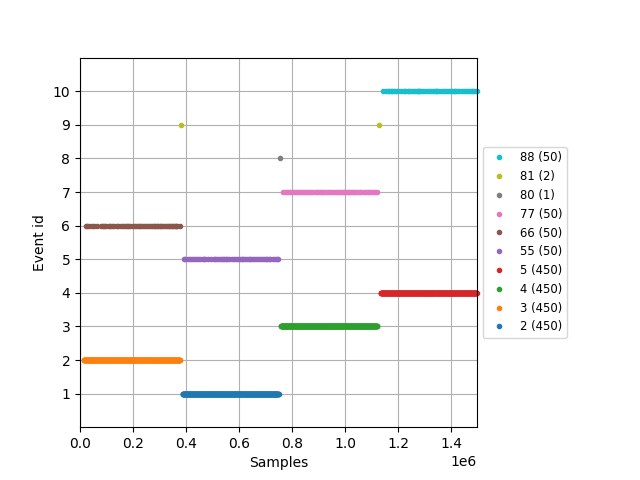

Opening raw-browser...


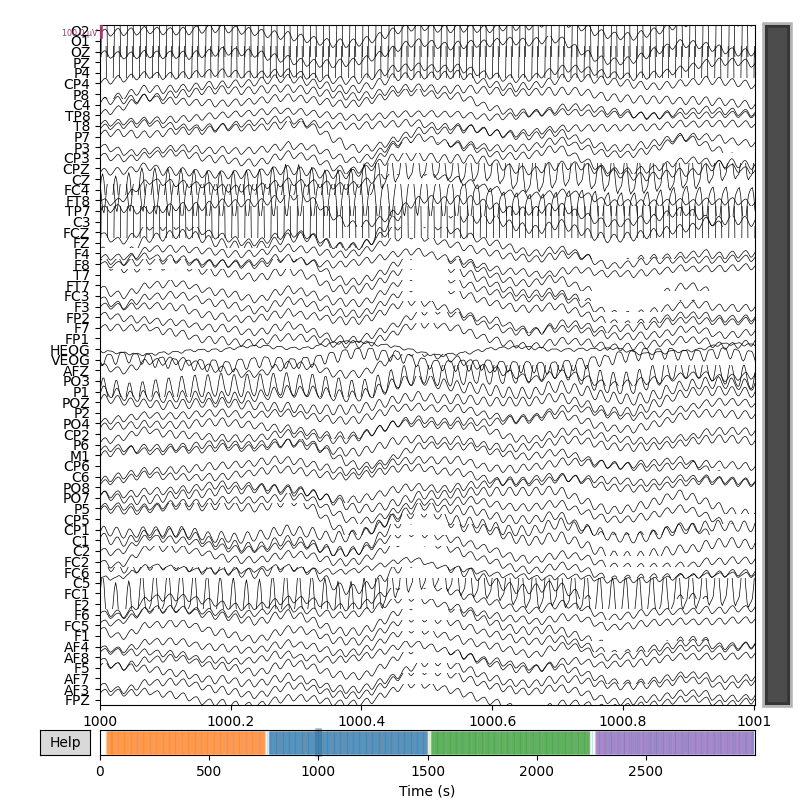

In [23]:
raw_index = 53 # index from 0 to 2147 cnt files
labels_filename = "DDP_labels.xlsx"
labels = pd.read_excel(os.path.join(local_paths.DDP, labels_filename)) 
raw = mne.io.read_raw_cnt(labels["path"][raw_index], preload = True)
events, event_dict = mne.events_from_annotations(raw)
fig = mne.viz.plot_events(events, event_id = event_dict)


In [30]:
labels["path"]

0       /volume-ceph/DDP_projectfolder/11mnd mmn/001_1...
1       /volume-ceph/DDP_projectfolder/11mnd mmn/003_1...
2       /volume-ceph/DDP_projectfolder/11mnd mmn/004_1...
3       /volume-ceph/DDP_projectfolder/11mnd mmn/005_1...
4       /volume-ceph/DDP_projectfolder/11mnd mmn/007_1...
                              ...                        
2143    /volume-ceph/DDP_projectfolder/47mnd mmn/704-0...
2144    /volume-ceph/DDP_projectfolder/47mnd mmn/705-0...
2145    /volume-ceph/DDP_projectfolder/47mnd mmn/709-0...
2146    /volume-ceph/DDP_projectfolder/47mnd mmn/710-0...
2147    /volume-ceph/DDP_projectfolder/47mnd mmn/711-0...
Name: path, Length: 2148, dtype: object

Opening raw-browser...


/home/fpauwels/.local/lib/python3.8/site-packages/mne/io/cnt/cnt.py:239: RuntimeWarning: overflow encountered in int_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
/tmp/ipykernel_3650971/3757104073.py:2: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = mne.io.read_raw_cnt(labels["path"][1700])


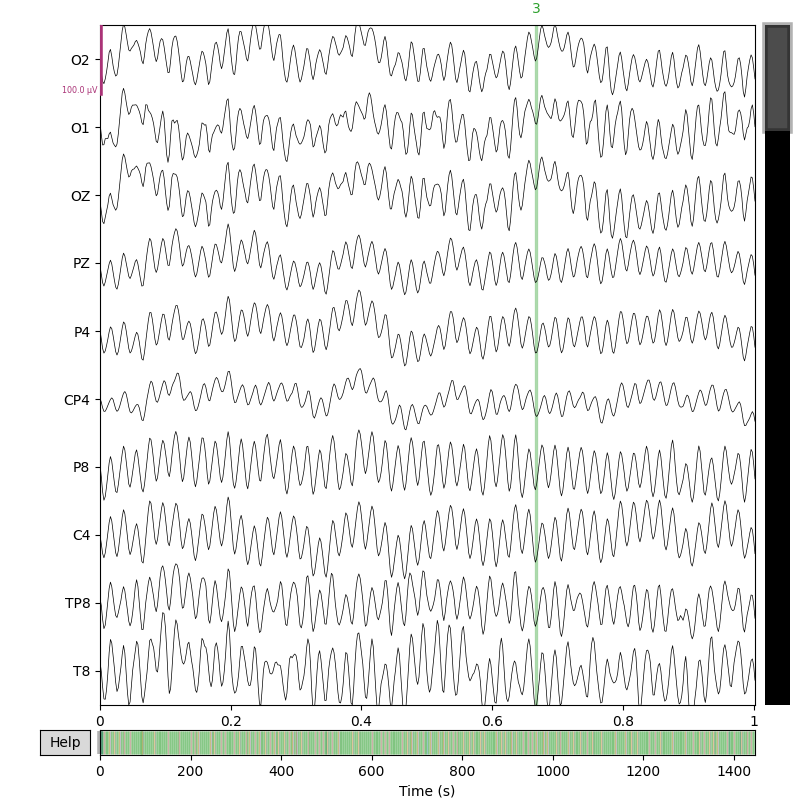

In [49]:
%matplotlib widget
raw = mne.io.read_raw_cnt(labels["path"][1700])
fig = mne.viz.plot_raw(raw, events, n_channels = 10, scalings = 50e-6, duration = 1)